# PyTorch Neural Network Classification Model -> 

#### Contents -> 
- Architecture of a Neural Network.
- Input and Output Shapes (Features and Labels).
- Creation of Custom data to view,fit and predict on.
- Model Creation -> Optimiser and Loss Function -> Training and Evaluating 
- Saving and Loading 
- Concept of Non - Linearity 
- Different classfication evaluation models 

In [619]:
try:
    import torch
    import torchvision
    from torch import nn
    import matplotlib.pyplot as plt
    import numpy as np
    import pandas as pd
    import sklearn
    print("Import successful!")
except:
    print("Import not successful!")

Import successful!


#### Classification Problem Input and Output Shapes →
- Input is usually Images
- Output is usually Prediction of what the image is/probabilities of different `classes

##### Input and Output Shapes -> 
- Inputs are Tensors like `[batch_size, colour_channels, width, height]`
    - Ex -> `[32,3,224,224]`
- Outputs are Tensors like `[0.002 , 0.000, ... , 0.991 , 0.004]` of constant shape representing probabilities of classification. Output shape depends upon the number of classifications
        


#### Architecture of a Classification Neural Network -> 

| Hyperparameter | Binary Classification | Multiclass classification |
|---|---|---|
| Input layer shape (in_features) | Same as number of features (e.g. 5 for age, sex, height, weight, smoking status in heart disease prediction) | Same as binary classification |
| Hidden layer(s) | Problem specific, minimum = 1, maximum = unlimited | Same as binary classification |
| Neurons per hidden layer | Problem specific, generally 10 to 512 | Same as binary classification |
| Output layer shape (out_features) | 1 (one class or the other) | 1 per class (e.g. 3 for food, person or dog photo) |
| Hidden layer activation | Usually ReLU (rectified linear unit) but can be many others | Same as binary classification |
| Output activation | Sigmoid (torch.sigmoid in PyTorch) | Softmax (torch.softmax in PyTorch) |
| Loss function | Binary crossentropy (torch.nn.BCELoss in PyTorch) | Cross entropy (torch.nn.CrossEntropyLoss in PyTorch) |
| Optimizer | SGD (stochastic gradient descent), Adam (see torch.optim for more options) | Same as binary classification |



#### Working with a Classification Model on a Toy Dataset

In [620]:
#1.Data -> 

from sklearn.datasets import make_circles
n_samples=500

X , y= make_circles(n_samples,noise=0.03,random_state=42)
len(X),len(y)

(500, 500)

In [621]:
X,y

(array([[-0.75093268,  0.2983924 ],
        [-0.20283523,  0.97779788],
        [-0.7827143 ,  0.02454953],
        [-0.69379555, -0.66860511],
        [-0.84145025,  0.55789191],
        [-0.70369963, -0.37579276],
        [-0.78560088, -0.00610819],
        [-0.98464139,  0.05694925],
        [-0.15785954,  0.9644189 ],
        [ 0.23086247, -0.79886668],
        [ 0.97783586,  0.21137   ],
        [ 0.19954351, -1.02542268],
        [-0.52258086, -0.59155599],
        [-0.55158646,  0.83278712],
        [-0.73742241,  0.07908682],
        [-0.74179558, -0.26227164],
        [ 0.7909894 , -0.11544299],
        [ 0.73049095,  0.6993851 ],
        [-0.01993179,  0.74067282],
        [-0.49194164, -0.57417168],
        [ 0.76383365, -0.21538361],
        [ 0.81093177, -0.17254725],
        [ 0.53715295,  0.55852977],
        [-0.67617801,  0.39339983],
        [-0.35162528,  0.90273032],
        [ 0.4357213 , -0.56685717],
        [ 0.75137715, -0.0855435 ],
        [ 0.56863687, -0.834

In [622]:
circles = pd.DataFrame({"X1":X[:,0],
                        "X2":X[:,1],
                        "label":y})

circles.tail(10)

,X1,X2,label
490,-1.007996,0.079635,0
491,0.849916,0.007584,1
492,0.820261,0.422530,0
493,0.043844,-1.015517,0
494,-0.261480,1.008640,0
495,-0.883063,0.467127,0
496,0.725332,0.346104,1
497,-0.671715,0.549582,1
498,-0.093347,-0.835089,1
499,-0.868201,0.608793,0


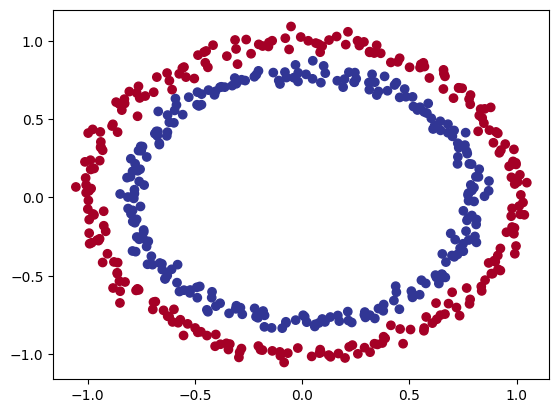

In [623]:
plt.scatter(x=X[:,0] , y=X[:,1], c=y,cmap=plt.cm.RdYlBu)

#### Checking Input and Output Shapes -> 

In [624]:
X.shape, y.shape

((500, 2), (500,))

In [625]:
X_sample , y_sample = X[0] , y[0]
print(X_sample) 
print(y_sample) 
print(X_sample.shape) 
print(y_sample.shape) 

[-0.75093268  0.2983924 ]
1
(2,)
()


In [626]:
#Turning data into tensors -> 
print(X)
# X = torch.from_numpy(X).type(torch.float)
# y = torch.from_numpy(y).type(torch.float)
type(X), X.dtype, y.dtype

[[-0.75093268  0.2983924 ]
 [-0.20283523  0.97779788]
 [-0.7827143   0.02454953]
 [-0.69379555 -0.66860511]
 [-0.84145025  0.55789191]
 [-0.70369963 -0.37579276]
 [-0.78560088 -0.00610819]
 [-0.98464139  0.05694925]
 [-0.15785954  0.9644189 ]
 [ 0.23086247 -0.79886668]
 [ 0.97783586  0.21137   ]
 [ 0.19954351 -1.02542268]
 [-0.52258086 -0.59155599]
 [-0.55158646  0.83278712]
 [-0.73742241  0.07908682]
 [-0.74179558 -0.26227164]
 [ 0.7909894  -0.11544299]
 [ 0.73049095  0.6993851 ]
 [-0.01993179  0.74067282]
 [-0.49194164 -0.57417168]
 [ 0.76383365 -0.21538361]
 [ 0.81093177 -0.17254725]
 [ 0.53715295  0.55852977]
 [-0.67617801  0.39339983]
 [-0.35162528  0.90273032]
 [ 0.4357213  -0.56685717]
 [ 0.75137715 -0.0855435 ]
 [ 0.56863687 -0.83433166]
 [-0.82953874  0.62801058]
 [-0.43714943  0.68559291]
 [ 0.65327082 -0.4943703 ]
 [-0.48872008  0.67255625]
 [ 0.10464241 -0.7862839 ]
 [-0.3537097  -0.93184703]
 [ 0.99098442  0.08574879]
 [-0.40934514  0.65544344]
 [-0.57271822 -0.60103083]
 

(numpy.ndarray, dtype('float64'), dtype('int64'))

In [627]:
#Splitting Data -> 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.25,  #25% data is training
                                                    random_state=42) 

X_train, X_test, y_train, y_test

(array([[ 0.01133283, -0.76188203],
        [-0.86119221,  0.4171373 ],
        [-0.57883805, -0.80036623],
        [-0.43987416, -0.73022297],
        [-0.79051996, -0.15407636],
        [-0.48872008,  0.67255625],
        [ 0.83207882,  0.56437495],
        [ 0.61775526,  0.45947896],
        [ 0.35062849, -0.93895004],
        [-0.0613933 ,  0.94558744],
        [ 0.8731384 ,  0.43007032],
        [-0.65294094, -0.46083898],
        [-0.35162528,  0.90273032],
        [ 0.73049095,  0.6993851 ],
        [ 0.98715859, -0.23191238],
        [ 0.28966389, -0.74986003],
        [ 0.67009962, -0.41299082],
        [-0.84925083, -0.59901794],
        [-0.17580456, -0.7531713 ],
        [ 0.25934725, -0.99895509],
        [ 0.13093046, -0.76402977],
        [-0.67617801,  0.39339983],
        [ 0.65888072,  0.81503605],
        [-1.00797053,  0.03047737],
        [ 0.37944536, -0.88972418],
        [-0.70369963, -0.37579276],
        [ 1.01131371, -0.05579485],
        [-0.30870715,  0.948

## Building a model to classify Red and Blue dots 
1. Device Agnostic code
2. Construct a model by subclassing nn.Module
3. Define a Loss function and an Optimiser  
4. Creating a training and testing loop

In [628]:
device = "cuda" if torch.cuda.is_available else "cpu"
print(device)
print(X_train.shape)
print(y_train.shape)

#Storing all the data on the gpu after turning np arrays to tensors

X_train = torch.tensor(X_train, dtype=torch.float32).to(device)
X_test = torch.tensor(X_test, dtype=torch.float32).to(device)
y_train = torch.tensor(y_train, dtype=torch.float).to(device)
y_test = torch.tensor(y_test, dtype=torch.float).to(device)

cuda
(375, 2)
(375,)


### Model Description -> 
1. Subclass `nn.Module`
2. Create 2 `nn.Linear()` layers that are capable of handing the shapes of our data.
3. Defines a `forward()` function that does the forward computation 
4. Instantiate an instance of our model and send it to `device`

In [629]:
class CircleModelV1(nn.Module):
    
    def __init__(self):
        super().__init__()
        
        #Creating nn.Linear layers with required shapes.
        self.layer1=nn.Linear(in_features=2,out_features=10) #Takes 2 features(X input R&B), Upscales to 10
        self.layer2=nn.Linear(in_features=10,out_features=1) #Takes 10 from layer1 -> gives 1(Y output 0/1)
        
        #Another way -> 
        # self.two_linear_layers = nn.Sequential(
        #     nn.Linear(in_features=2,out_features=10),
        #     nn.Linear(in_features=10,out_features=1)
        # ).to(device)
        
        def forward(self,x):
            return self.layer2(self.layer1(x)) # x--> layer1 --> layer2
            # return self.two_linear_layers(x)
        

In [630]:
model_0= CircleModelV1().to(device)
print(model_0)

next(model_0.parameters()).device

CircleModelV1(
  (layer1): Linear(in_features=2, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=1, bias=True)
)


device(type='cuda', index=0)

### More visualisation on https://playground.tensorflow.org/

In [631]:
#Alternative way to create simpler models -> 

model_0=nn.Sequential(
    nn.Linear(in_features=2,out_features=10),
    nn.Linear(in_features=10,out_features=1)
    ).to(device)

print(model_0)

print(model_0.state_dict())

#^^ First layer has 2 * 10 = 20 parameters and Second layer has 10 * 1 = 10 parameters. More the hidden layers mode the number of paramters. 

Sequential(
  (0): Linear(in_features=2, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=1, bias=True)
)
OrderedDict({'0.weight': tensor([[-0.1918,  0.2976],
        [ 0.6313,  0.4087],
        [-0.3091,  0.4082],
        [ 0.1265,  0.3591],
        [-0.4310, -0.7000],
        [-0.2732, -0.5424],
        [ 0.5802,  0.2037],
        [ 0.2929,  0.2236],
        [-0.0123,  0.5534],
        [-0.5024,  0.0445]], device='cuda:0'), '0.bias': tensor([-0.4826,  0.2180, -0.2435,  0.2167, -0.1473,  0.5865, -0.4191, -0.4217,
        -0.4217,  0.6360], device='cuda:0'), '1.weight': tensor([[ 0.1054,  0.3043, -0.2610, -0.3137, -0.2474, -0.2127,  0.1281,  0.1132,
          0.2628, -0.1633]], device='cuda:0'), '1.bias': tensor([-0.2156], device='cuda:0')})


In [632]:
#Making predictions from untrained data -> 
with torch.inference_mode():
    untrained_pred=torch.round(model_0(X_test)) #Without torch.round, Predictions are of type 0.88 But Test are either 0 or 1.
print(f"Length of Untrained Predictions :{len(untrained_pred)} & Shape: {untrained_pred.shape}")
print(f"Length of X_test  :{len(X_test)} & Shape: {X_test.shape}")

#Shape is different just because of one extra bracket, Can be remove by Squeeze.
print(untrained_pred)
print(y_test)

Length of Untrained Predictions :125 & Shape: torch.Size([125, 1])
Length of X_test  :125 & Shape: torch.Size([125, 2])
tensor([[-0.],
        [-0.],
        [-0.],
        [-1.],
        [-1.],
        [-0.],
        [-1.],
        [-0.],
        [-0.],
        [-0.],
        [-1.],
        [-1.],
        [-0.],
        [-0.],
        [-1.],
        [-1.],
        [-1.],
        [-0.],
        [-1.],
        [-0.],
        [-1.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-1.],
        [-1.],
        [-1.],
        [-1.],
        [-1.],
        [-1.],
        [-1.],
        [-1.],
        [-1.],
        [ 0.],
        [-1.],
        [-1.],
        [-1.],
        [-0.],
        [-1.],
        [-0.],
        [-1.],
        [-1.],
        [-1.],
        [-0.],
        [-1.],
        [-1.],
        [-0.],
        [-0.],
        [-0.],
        [-1.],
        [-1.],
        [-1.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-

### Setting up Loss Function and Optimisers

- Loss Function : 
    - For Regression -> MSE or MAE
    - For Classification -> Binary Cross Entropy or Categorical Cross Entropy

| Loss function/Optimizer | Problem type | PyTorch Code |
|---|---|---|
| Stochastic Gradient Descent (SGD) optimizer | Classification, regression, many others. | torch.optim.SGD() |
| Adam Optimizer | Classification, regression, many others. | torch.optim.Adam() |
| Binary cross entropy loss | Binary classification | torch.nn.BCELossWithLogits or torch.nn.BCELoss |
| Cross entropy loss | Mutli-class classification | torch.nn.CrossEntropyLoss |
| Mean absolute error (MAE) or L1 Loss | Regression | torch.nn.L1Loss |
| Mean squared error (MSE) or L2 Loss | Regression | torch.nn.MSELoss |
| Loss function | Binary crossentropy (torch.nn.BCELoss in PyTorch) | Cross entropy (torch.nn.CrossEntropyLoss in PyTorch) |
| Optimizer | SGD (stochastic gradient descent), Adam (see torch.optim for more options) | Same as binary classification |

The BCELoss() expects the inputs to be already passed through the sigmoid activation function but the BCELossWithLogits() doesnt.

Also High level, **BCEWithLogitsLoss() => nn.Sigmoid() --> nn.BCELoss()**

But in reality, BCEWithLogitsLoss() is more numerically stable than doing the above sequentially as it takes advantage of **log-sum-exp trick**.


In [633]:
# loss_fn=nn.BCELoss() #This requires the inputs to the function to be already passed through the sigmoid activation function.
loss_fn=nn.BCEWithLogitsLoss()  #BCEWithLogitsLoss -> Built in Sigmoid Activation Function


In [634]:
optimizer=torch.optim.SGD(params=model_0.parameters(), lr=0.1)

In [635]:
#Defining an accuracy function -->

def accuracy_fn(y_true,y_pred):
    correct=torch.eq(y_true,y_pred).sum().item()
    acc=(correct/len(y_pred)) *100
    return acc


### Training the Model -> 

    - Forward Pass
    - Calculate the loss
    - Optimizer zero grad
    - Back Propagation / Loss Backward
    - Gradient Descent / Optimizer Step

##### 1. Going from Raw Logits -> Prediction Probabilities -> Prediction Labels

- Our model outputs are raw **logits**.

- We can convert these **logits** to *prediction probabilities* using an Activation Function -> 
    - Sigmoid Function for Binary Classification
    - Softmax Function for Multiclass Classification

- Then we can convert the *prediction probabilities* to **prediction labels** by either rounding off or using argmax().


In [636]:
model_0.eval()

with torch.inference_mode():
    y_logits = model_0(X_test.to(device))

y_logits

tensor([[-0.0682],
        [-0.0575],
        [-0.0525],
        [-0.8446],
        [-0.5335],
        [-0.0441],
        [-1.2592],
        [-0.2714],
        [-0.1755],
        [-0.0803],
        [-0.8100],
        [-0.9665],
        [-0.1842],
        [-0.3544],
        [-1.0280],
        [-1.2986],
        [-0.9132],
        [-0.4455],
        [-1.1142],
        [-0.0076],
        [-1.1443],
        [-0.1265],
        [-0.1398],
        [-0.3846],
        [-0.0522],
        [-0.1598],
        [-0.7598],
        [-1.0912],
        [-0.9814],
        [-1.1994],
        [-1.1126],
        [-1.1431],
        [-0.6051],
        [-1.0442],
        [-1.0401],
        [ 0.0904],
        [-0.8429],
        [-0.7907],
        [-0.8944],
        [-0.3666],
        [-0.6124],
        [-0.4044],
        [-0.5779],
        [-1.2751],
        [-1.1948],
        [-0.3121],
        [-0.9087],
        [-0.9216],
        [-0.2676],
        [-0.0744],
        [-0.0599],
        [-1.1641],
        [-1.

In [637]:
y_pred_probs=torch.sigmoid(y_logits)
print(y_pred_probs)
print("\n\nAfter Rounding Off ->")
#Finding the predicted labels -> 
y_pred= torch.round(y_pred_probs)
y_pred

tensor([[0.4830],
        [0.4856],
        [0.4869],
        [0.3006],
        [0.3697],
        [0.4890],
        [0.2211],
        [0.4326],
        [0.4562],
        [0.4799],
        [0.3079],
        [0.2756],
        [0.4541],
        [0.4123],
        [0.2635],
        [0.2144],
        [0.2863],
        [0.3904],
        [0.2471],
        [0.4981],
        [0.2415],
        [0.4684],
        [0.4651],
        [0.4050],
        [0.4870],
        [0.4601],
        [0.3187],
        [0.2514],
        [0.2726],
        [0.2316],
        [0.2474],
        [0.2418],
        [0.3532],
        [0.2603],
        [0.2611],
        [0.5226],
        [0.3009],
        [0.3120],
        [0.2902],
        [0.4094],
        [0.3515],
        [0.4002],
        [0.3594],
        [0.2184],
        [0.2324],
        [0.4226],
        [0.2873],
        [0.2846],
        [0.4335],
        [0.4814],
        [0.4850],
        [0.2379],
        [0.2672],
        [0.2176],
        [0.4831],
        [0

tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
      

In [638]:
#In full , y_predictions -> Sigmoid -> Rounded  or logits -> prediction probabilities -> prediction labels
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test)))

#Checking for equality -> 
print(torch.eq(y_pred.squeeze(),y_pred_labels.squeeze()))
print(y_pred.squeeze())
print(y_pred_labels.squeeze())

tensor([True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True], device='cuda:0')
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 

### Building and Running Training and Testing loops -> 


In [639]:
torch.cuda.manual_seed(42)
torch.manual_seed(42)

X_train, y_train, X_test, y_test= X_train.to(device),y_train.to(device),X_test.to(device),y_test.to(device)
X_train

tensor([[ 0.0113, -0.7619],
        [-0.8612,  0.4171],
        [-0.5788, -0.8004],
        [-0.4399, -0.7302],
        [-0.7905, -0.1541],
        [-0.4887,  0.6726],
        [ 0.8321,  0.5644],
        [ 0.6178,  0.4595],
        [ 0.3506, -0.9390],
        [-0.0614,  0.9456],
        [ 0.8731,  0.4301],
        [-0.6529, -0.4608],
        [-0.3516,  0.9027],
        [ 0.7305,  0.6994],
        [ 0.9872, -0.2319],
        [ 0.2897, -0.7499],
        [ 0.6701, -0.4130],
        [-0.8493, -0.5990],
        [-0.1758, -0.7532],
        [ 0.2593, -0.9990],
        [ 0.1309, -0.7640],
        [-0.6762,  0.3934],
        [ 0.6589,  0.8150],
        [-1.0080,  0.0305],
        [ 0.3794, -0.8897],
        [-0.7037, -0.3758],
        [ 1.0113, -0.0558],
        [-0.3087,  0.9485],
        [ 0.7910, -0.1154],
        [ 0.3145,  0.9315],
        [-0.1429, -0.8333],
        [-0.6938, -0.6686],
        [-0.6804,  0.4220],
        [ 0.8053, -0.2492],
        [ 0.7682, -0.1464],
        [-0.9916, -0

In [640]:

epochs=100
for epoch in range(epochs):
    model_0.train()
    
    #Forward Pass -> 
    y_logits = model_0(X_train).squeeze()
    y_pred=torch.round(torch.sigmoid(y_logits))
    
    
    #Calculating loss, Accuracy
    loss = loss_fn(y_logits , y_train)  # Usually we have passed y_pred here but as our loss fn is bcewith logits, It expects logits.
    #We couldve done loss = nn.BCELoss(torch.sigmoid(y_logits),y_test) but not doing it for numerical stability.
    accuracy = accuracy_fn(y_true=y_train, y_pred=y_pred)
    
    
    #Optimiser Zero Grad -> 
    optimizer.zero_grad()
    
    #Back Propagation
    loss.backward()
    
    #Optimiser step -> 
    optimizer.step()
    
    
    #Testing -->
    model_0.eval()
    
    with torch.inference_mode():
        
        test_logits=model_0(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        
        test_loss = loss_fn(test_logits,y_test)
        test_accuracy =accuracy_fn(y_test,test_pred)
        
    if epoch%100==0:
        print(f"Epoch -> {epoch}\nTraining Loss -> {loss}\nTesting Loss -> {test_loss}\nTraining Accuracy -> {accuracy}%\nTesting Accuracy -> {test_accuracy}%\n\n\n")

Epoch -> 0
Training Loss -> 0.760085940361023
Testing Loss -> 0.7554232478141785
Training Accuracy -> 41.6%
Testing Accuracy -> 41.6%





Maza nahi aaya

#### Making predictions and Evaluating our model -> 

The model learning and accuracy isnt getting better. Tried 100000 epochs too. 
So lets inspect the model and make some predictions. 

Trying to Visualise -->
- We will use `plot_decision_boundary()`

In [641]:
from helper_functions import plot_decision_boundary, plot_predictions

#Both of these functions are in the helper_functions.py

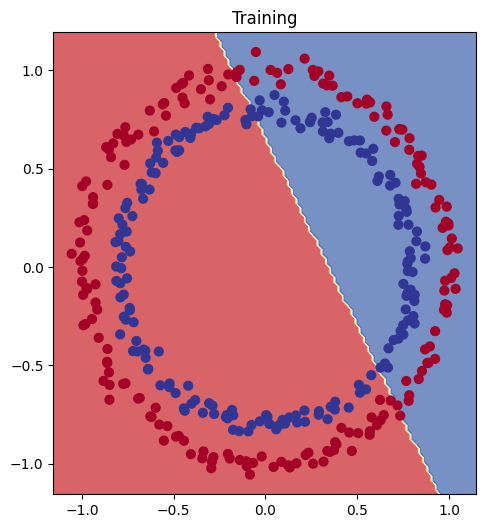

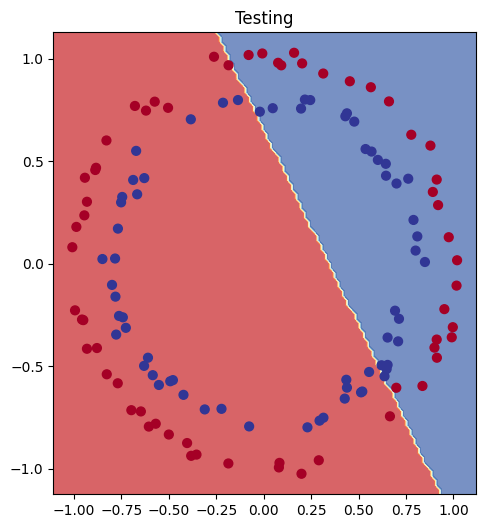

In [642]:
#Plotting -> 
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Training")
plot_decision_boundary(model_0,X_train,y_train)

plt.figure(figsize=(12,6))
plt.subplot(1,2,2)
plt.title("Testing")
plot_decision_boundary(model_0,X_test,y_test)

The above distribution is coming out as a "Straight Line" because we have only used Linear layers. 

### Improving the model

- Add more layers -> Gives the model, More chance to learn and understand data
- Add more hidden units -> Add more in/out_features in our layers
- Fit for longer -> Increased Epochs 
- **Changing the activation functions**
- Changing the loss function 

As we set and change them rather than random input and they deal directly with the model, We call them **Model Hyperparameters**

In [643]:
#Trying to add more Layers , Hidden Units and Epoch -> 

#It is better to do it like => Add Layers -> Track Results , Add HU -> TR , Increase E -> TR so we easily get to know on which hyperparameter's change the output got better/worse. This is called Experiment Tracking in machine learning.

class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.layer1=nn.Linear(in_features=2, out_features=128)
        self.layer2=nn.Linear(in_features=128, out_features=128)  #out_features => 10 -> 128
        self.layer3=nn.Linear(in_features=128, out_features=1)  #Number of layers => 2 -> 3
        
    def forward(self,x:torch.Tensor) -> torch.Tensor :
        return self.layer3(self.layer2(self.layer1(x)))
    
model_1=CircleModelV2().to(device)


In [644]:
print(model_0.state_dict())
print("\n\n")
print(model_1.state_dict())


OrderedDict({'0.weight': tensor([[-0.2052,  0.2937],
        [ 0.5719,  0.3913],
        [-0.2407,  0.4258],
        [ 0.2061,  0.3788],
        [-0.3854, -0.6863],
        [-0.2529, -0.5345],
        [ 0.5811,  0.2006],
        [ 0.2892,  0.2205],
        [-0.0587,  0.5403],
        [-0.4961,  0.0492]]), '0.bias': tensor([-0.4717,  0.2622, -0.2857,  0.1693, -0.1822,  0.5636, -0.4079, -0.4113,
        -0.3879,  0.6206]), '1.weight': tensor([[ 0.0631,  0.1686, -0.2597, -0.3477, -0.1293, -0.0278, -0.0888, -0.0347,
          0.1758,  0.0508]]), '1.bias': tensor([-0.0632])})



OrderedDict({'layer1.weight': tensor([[ 0.5406,  0.5869],
        [-0.1657,  0.6496],
        [-0.1549,  0.1427],
        [-0.3443,  0.4153],
        [ 0.6233, -0.5188],
        [ 0.6146,  0.1323],
        [ 0.5224,  0.0958],
        [ 0.3410, -0.0998],
        [ 0.5451,  0.1045],
        [-0.3301,  0.1802],
        [-0.3258, -0.0829],
        [-0.2872,  0.4691],
        [-0.5582, -0.3260],
        [-0.1997, -0.4252

In [645]:
#Initiating loss function , optimizer, seed and epochs 
loss_fn = nn.BCEWithLogitsLoss()
optimizer=torch.optim.SGD(params=model_1.parameters(), lr=0.1)
torch.manual_seed(42)
torch.cuda.manual_seed(42)
epochs = 1001 #Increased from 100 -> 1000

#Device agnostic code
X_train, X_test, y_train, y_test = X_train.to(device),X_test.to(device),y_train.to(device),y_test.to(device)



In [646]:
for epoch in range(epochs):
    
    #Training ->
    model_1.train()
    y_prediction_logits= model_1(X_train).squeeze()
    y_prediction_labels = torch.round(torch.sigmoid(y_prediction_logits))
    loss=loss_fn(y_prediction_logits,y_train)
    accuracy=accuracy_fn(y_true=y_train, y_pred=y_prediction_labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    #Testing -> 
    model_1.eval()
    with torch.inference_mode():
        test_prediction_logits = model_1(X_test).squeeze()
        test_prediction_labels = torch.round(torch.sigmoid(test_prediction_logits))
        test_loss = loss_fn(test_prediction_labels,y_test)
        accuracy=accuracy_fn(y_true=y_test, y_pred= test_prediction_labels)
    
    #Printing -> 
    if epoch%200 == 0:
        print(f"Epoch -> {epoch}\nTraining Loss -> {loss}\nTesting Loss -> {test_loss}\nTraining Accuracy -> {accuracy}%\nTesting Accuracy -> {test_accuracy}%")

Epoch -> 0
Training Loss -> 0.6935146450996399
Testing Loss -> 0.7519194483757019
Training Accuracy -> 48.0%
Testing Accuracy -> 49.6%
Epoch -> 200
Training Loss -> 0.6928898096084595
Testing Loss -> 0.7651930451393127
Training Accuracy -> 44.0%
Testing Accuracy -> 49.6%
Epoch -> 400
Training Loss -> 0.6928898096084595
Testing Loss -> 0.7651930451393127
Training Accuracy -> 44.0%
Testing Accuracy -> 49.6%
Epoch -> 600
Training Loss -> 0.6928898096084595
Testing Loss -> 0.7651930451393127
Training Accuracy -> 44.0%
Testing Accuracy -> 49.6%
Epoch -> 800
Training Loss -> 0.6928898096084595
Testing Loss -> 0.7651930451393127
Training Accuracy -> 44.0%
Testing Accuracy -> 49.6%
Epoch -> 1000
Training Loss -> 0.6928898096084595
Testing Loss -> 0.7651930451393127
Training Accuracy -> 44.0%
Testing Accuracy -> 49.6%


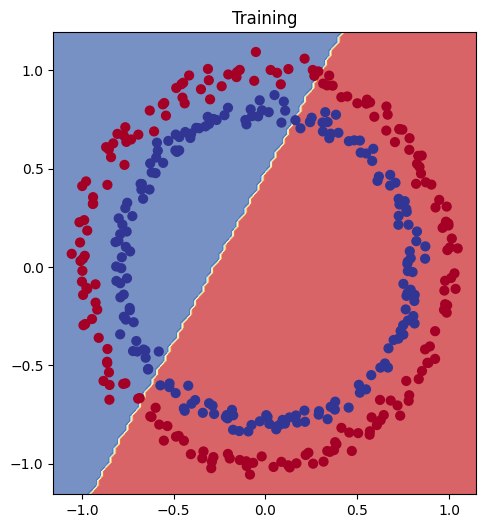

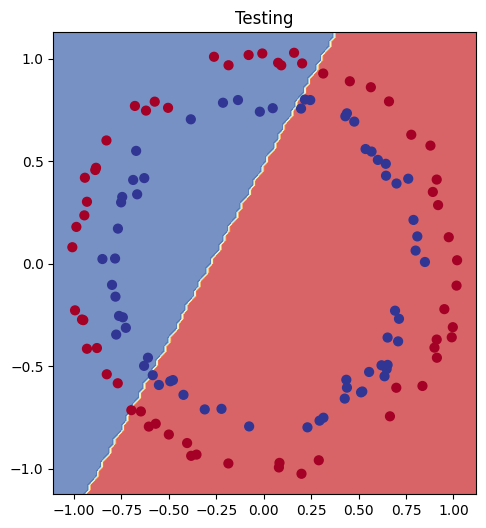

In [647]:
#Plotting -> 
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Training")
plot_decision_boundary(model_1,X_train,y_train)

plt.figure(figsize=(12,6))
plt.subplot(1,2,2)
plt.title("Testing")
plot_decision_boundary(model_1,X_test,y_test)

### This looks like the model is not learning anything at all.

Preparing a dataset to see if our model can fit onto a straight line data.

One way to troubleshoot a larger problem is to test on a smaller problem.

In [783]:
#Creating data, Same as 01_PyTorch_Fundamentals 's Weight, Bias Data.

weight = 0.3
bias = 0.7

X_regression=torch.arange(1.,2,0.0002).unsqueeze(dim= 1)
y_regression= weight*X_regression + bias


In [784]:
#Creating Training and Test Splits -> 
training_split=int(0.8*len(X_regression))
print(training_split)

X_regression_train,X_regression_test,y_regression_train, y_regression_test = X_regression[:training_split].to(device),X_regression[training_split:].to(device),y_regression[:training_split].to(device),y_regression[training_split:].to(device)

X_regression_test,X_regression_train,y_regression_test,y_regression_train




4000


(tensor([[1.8000],
         [1.8002],
         [1.8004],
         [1.8006],
         [1.8008],
         [1.8010],
         [1.8012],
         [1.8014],
         [1.8016],
         [1.8018],
         [1.8020],
         [1.8022],
         [1.8024],
         [1.8026],
         [1.8028],
         [1.8030],
         [1.8032],
         [1.8034],
         [1.8036],
         [1.8038],
         [1.8040],
         [1.8042],
         [1.8044],
         [1.8046],
         [1.8048],
         [1.8050],
         [1.8052],
         [1.8054],
         [1.8056],
         [1.8058],
         [1.8060],
         [1.8062],
         [1.8064],
         [1.8066],
         [1.8068],
         [1.8070],
         [1.8072],
         [1.8074],
         [1.8076],
         [1.8078],
         [1.8080],
         [1.8082],
         [1.8084],
         [1.8086],
         [1.8088],
         [1.8090],
         [1.8092],
         [1.8094],
         [1.8096],
         [1.8098],
         [1.8100],
         [1.8102],
         [1.

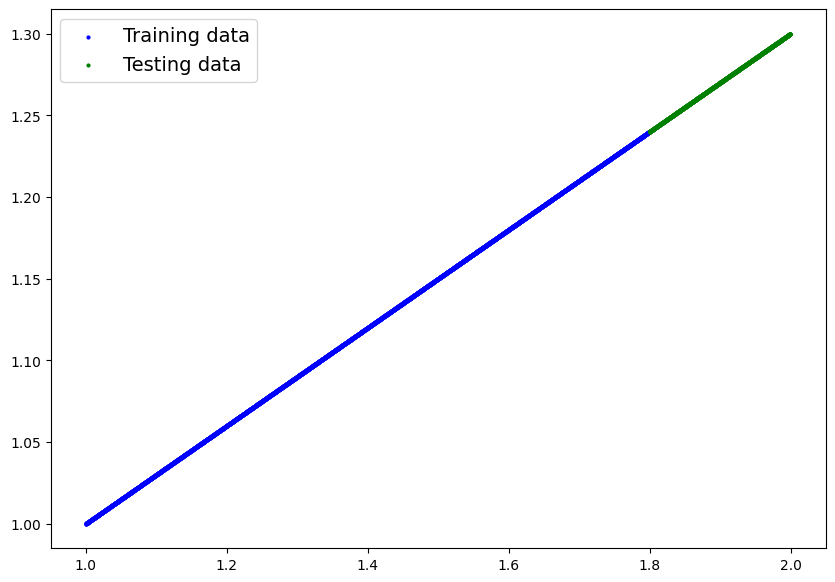

In [785]:
plot_predictions(train_data=X_regression_train.cpu(), train_labels=y_regression_train.cpu(), test_data=X_regression_test.cpu(), test_labels=y_regression_test.cpu())

### Fitting model_1 onto a straight line -> 

In [786]:
#Same architecture as Model_1 but using sequential for practice -> 
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1))

model_2= model_2.to(device)
model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [787]:
loss_fn_reg=nn.L1Loss()
optimizer_reg=torch.optim.SGD(params=model_2.parameters(),lr=0.01)

In [799]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1001
for epoch in range(epochs):
    #Training
    model_2.train()
    y_pred_reg=model_2(X_regression_train)
    loss_reg=loss_fn_reg(y_pred_reg,y_regression_train)
    optimizer_reg.zero_grad()
    loss_reg.backward()
    optimizer_reg.step()
    
    #Testing 
    model_2.eval()
    with torch.inference_mode():
        test_y_pred_reg=model_2(X_regression_test)
        test_loss_reg=loss_fn_reg(test_y_pred_reg,y_regression_test)
        
    if epoch%2==0:
        print(f"Epoch ->{epoch}\nTraining Loss -> {loss_reg}\nTesting Loss -> {test_loss_reg}")

Epoch ->0
Training Loss -> 0.030941307544708252
Testing Loss -> 0.0027724644169211388
Epoch ->2
Training Loss -> 0.031929079443216324
Testing Loss -> 0.0014523816062137485
Epoch ->4
Training Loss -> 0.03291445970535278
Testing Loss -> 0.000887404487002641
Epoch ->6
Training Loss -> 0.0338975265622139
Testing Loss -> 0.001340641058050096
Epoch ->8
Training Loss -> 0.03487822785973549
Testing Loss -> 0.0025833884719759226
Epoch ->10
Training Loss -> 0.03130121901631355
Testing Loss -> 0.002022525994107127
Epoch ->12
Training Loss -> 0.03228556737303734
Testing Loss -> 0.0010158248478546739
Epoch ->14
Training Loss -> 0.03326757624745369
Testing Loss -> 0.0010288555640727282
Epoch ->16
Training Loss -> 0.03424721583724022
Testing Loss -> 0.001985369948670268
Epoch ->18
Training Loss -> 0.034536536782979965
Testing Loss -> 0.0024176216684281826
Epoch ->20
Training Loss -> 0.03220854327082634
Testing Loss -> 0.0009839573176577687
Epoch ->22
Training Loss -> 0.03318849205970764
Testing Loss 

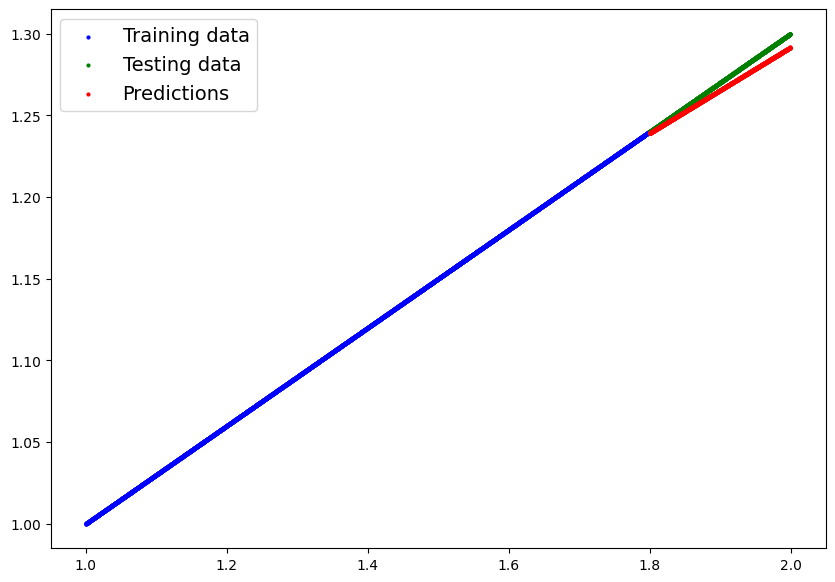

In [800]:
#Great output up ^ 
#Plotting for better visualisation -> 

model_2.eval()
with torch.inference_mode():
    y_prediction_reg=model_2(X_regression_test).to(device)
    
plot_predictions(X_regression_train.cpu(),y_regression_train.cpu(),X_regression_test.cpu(),y_regression_test.cpu(),y_prediction_reg.cpu())

Our Model works perfectly for linear data as it comprises of Linear Functions only.